###                    Incidencia acumulada


## Trabajo Programación

### Gráfico de Incidencia acumulada COVID19 a fecha de hoy:
**Parámetros:**
 + **Comunidad Autónoma:** para una Comunidad Autónoma dada
 + **Periodo de acumulación** 7 o 14 días
Este programa captura un código de CCAA y un periodo (7 o 14 días) y hace una gráfica de la evolución diaria de la Incidencia acumulada a partir de los datos
notificados a la Red Nacional de Vigilancia Epidemiológica desde el 1 de enero de 2020 (Datos_Casos_COVID19.csv)

Introduzca codigo ISO comunidad autónoma (2 caracteres) o TO para total España: to
Introduzca periodo incidencia acumulada: 7 o 14 días 14


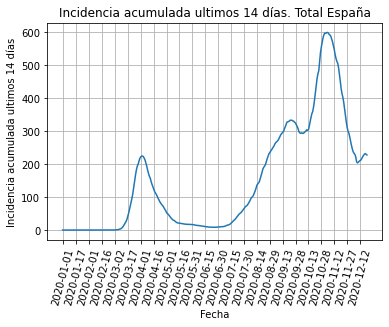

In [1]:
### IMPORT LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
####                                              FUNCIONES
### CARGA DICCIONARIO DE CC AA del fichero 
def carga_ccaa (nfic, dic):
    dic={}
    lis=[]
    fichero = open(nfic, "r",encoding="utf-8-sig")
    linea = fichero.readline().strip() # Leo registro cabecera
    if linea:
        linea = fichero.readline().strip()   ### Leo primera linea de datos
    while linea:                             ### cada registro (ccaa) un elemento del diccionario
        reg=linea.split(";")
        dic[reg[0]] = reg[2]
        linea = fichero.readline().strip()
    fichero.close()
    return dic
###  CARGA DICCIONARIO DE POBLACION POR CCAA
def carga_dic_pob_ccaa():   ### FUNCIÓN CARGA DICCIONARIO DE POBLACION POR CCAA de fichero 'ccaa_pob.csv'
    nfic='ccaa_pob.csv'
    dic={}
    fichero = open(nfic, "r",encoding="utf-8-sig")
    linea = fichero.readline().strip() # Etiquetas de cabecera
    cabecera=linea.split(";")

    if linea:
        linea = fichero.readline().strip()
    while linea:
        reg=linea.split(";")
        dic[reg[1]] = reg[2]
        linea = fichero.readline().strip()
    fichero.close()
    return dic

### Carga último fichero Datos_Casos_COVID19.csv  DataFrame casos
def carga_casos():      ### Carga fichero de casos por CCAA y día en DataFrame casos
    import pandas as pd
    pd.options.display.max_rows = 10
    casos = pd.read_csv('https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Casos_COVID19.csv',
                   encoding='latin-1',
                   skiprows=6,
#                   nrows=20,
                   sep=';')
    casos['Fecha']= pd.to_datetime(casos['Fecha'], format="%d-%m-%Y") ### Covierte string fecha en datetime
    casos=casos.set_index('Fecha')                                    ### pongo la fecha como indice
    return casos

### Entrada codigo de comunidad autonoma
def entra_ccaa():    ### captura codigo ISO CCAA
    lis_ccaa=['CE', 'ML', 'AN', 'AR', 'AS', 'CN', 'CB', 'CL', 'CM', 'CT',
              'PV', 'EX', 'GA', 'IB', 'RI', 'MD', 'MC', 'NC', 'VC','TO']
    ccaa=input('Introduzca codigo ISO comunidad autónoma (2 caracteres) o TO para total España:')
    ccaa=ccaa.upper()
    while ccaa not in lis_ccaa:
        print("código ISO erróneo")
        print ("Los códigos validos son ", lis_ccaa)
        ccaa=input('Introduzca codigo ISO comunidad autónoma:')
        ccaa=ccaa.upper()
    ccaa2='ES-'+ccaa
    return ccaa

### Entrada periodo para incidencia acumulada
def entra_per():    ### captura variable para gráfico incidencia acumulada
    nratio=input('Introduzca periodo incidencia acumulada: 7 o 14 días')
    while nratio not in ('7','14'):
        print ('variable debe valer 7 o 4')
        nratio=input('Introduzca periodo incidencia acumulada: 7 o 14 días')
    if nratio == "7":
        diasp=7
    elif nratio =='14':
        diasp=14
#    elif nratio == "":
#        ratio=''
    return diasp

def plot_InAc(lf,l_inac,ccaa2,per):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    lista_fechas=lf[::15] #  nos quedamos con una de cada 15 para etiquetas
    lista_fechasf=[]
    for i in lista_fechas:
        lista_fechasf.append(i.strftime('%Y-%m-%d'))
        
    plt.xticks(lista_fechas, lista_fechasf, 
                   rotation=75) 
    plt.title('Incidencia acumulada ultimos '+ str(per) +  ' días. ' + d_ccaa[ccaa2])
    plt.xlabel('Fecha')
    plt.ylabel('Incidencia acumulada ultimos '+ str(per) + ' días')
    plt.rcParams["figure.figsize"] = (10.0, 7.5)
    plt.grid()
    ax.plot(lf, l_inac)  # 
    return

###               PROGRAMA PRINCIPAL d_ccaa
###            CARGA DICCIONARIO DE CCAA d_ccaa
nfic="ccaa.csv"   #### fichero de claves de CCAA fichero "ccaa.csv"
dic_ccaa={}
d_ccaa=carga_ccaa (nfic, dic_ccaa)
# print(d_ccaa)

###  CARGA DICCIONARIO DE POBLACION POR CCAA dic_pob_ccaa
dic_pob_ccaa=carga_dic_pob_ccaa()

###  CARGA FICHERO DE CASOS COVID EN DATAFRAME df
df=carga_casos()

### Entrada código comunidad autonoma
ccaa2=entra_ccaa()
ccaa='ES-'+ccaa2

### Entrada del periodo de dias para cálculo deincidencia acumulada
per=entra_per()

### Cargo la población de la comunidad de la que se desea hacer gráfica (TO Total España)
pob=int(dic_pob_ccaa[ccaa2])

### Hace datframe nuevo df_casos, solo con los datos a tratar (unica comunidad autonoma o toda España)
if ccaa != 'ES-TO':
    es_ccaa=df.loc[:,'CCAA_ISO'] == ccaa
    df_casos = df.loc[es_ccaa]
else:
    df_casos=df

### Hace nuevo dataframe excluyendo las columnas innecesarias para calculo de Incidencia Acumulada 
df2=df_casos.drop(columns=['CCAA_ISO', 'Hospitalizados', 'UCI', 'Fallecidos'])

### para cada fecha me quedo con un unica fila por fecha con la suma de todos los ratios para esa fecha 
###            (imprescindible para TOTAL ESPAÑA)
df2=df2.groupby('Fecha').sum()

### Añado columna de diagnosticados acumulado, necesaria para calculo de Incidencia Acumulada
df2['Diagnosticados_ac'] = df2['Casos_Diagnosticados'].cumsum() ### Añado columna de diagnosticados acumulados

### Obtiene Serie de suma de Casos_Diagnosticados indexados por Fecha  (datetime)
casosf=df2.groupby(['Fecha'])['Casos_Diagnosticados'].sum()

###                   Calculo de la Incidencia acumulada
###  Para el calculo del numero de personas libres de la enfermedad 
###  hacemos un aproximación: (población a 1-1-2020) - (contagiados acumulados a la fecha)
### habría que tener en cuenta la población de la fecha y al total contagiados acumulados restarle los muertos y los recuperados) 

### Obtengo lista de fechas lf y lista de Incidencias acumuladas l_inac a partir del dataframe df2
delta = timedelta(days=+per-1) ### para la incidencia acumulada del periodo
delta2 = timedelta(days=+per)  ### para el total de contagiados al inicio del periodo
lf, l_acum_per, l_acum_iniper, l_fini,  l_inac, l_sanos=[],[],[],[],[],[]

acum_iniper=0
acum_iniper_ant=0
for ff in  casosf.index:
    acum_per=casosf[ff - delta:ff].sum()
    if (ff -delta2) in casosf: ### si la fecha de inicio de periodo esta en el dataframe saca los Diagnosticados acumulado
        acum_iniper=(df2['Diagnosticados_ac'] [ff - delta2:ff - delta2])[ff - delta2]
        acum_iniper_ant=acum_iniper
    else:                      ### si no está tomo los diagnosticados acumulados del ultimo registro leido
        acum_iniper=acum_iniper_ant
            
    inac = (acum_per * 100000) / (pob - acum_iniper)
    lf.append(ff)
    l_inac.append(inac)
#    l_fini.append((ff-delta).strftime('%d-%m-%Y'))
#    l_acum_per.append(acum_per)
#    l_acum_iniper.append(acum_iniper)
#    l_sanos.append(pob - acum_iniper)

###  Se guardan los datos del calculo en un fichero para comprobación
#df2['Diag_per']=l_acum_per
#df2['fini_per']=l_fini
#df2['Diagini_per']=l_acum_iniper
#df2['Sanos']=l_sanos
#df2['inac']=l_inac
#n_fich='IncAc_' +str(per)+'_'+ ccaa2 + '.csv'
#df2.to_csv(n_fich)

### Gráfica de casos diagnosticados por fecha apartir de lista de fechas y lista de incidencias acumuladas por fecha
plot_InAc(lf,l_inac,ccaa2,per)

